In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [45]:
dat_file = np.load('data/student.npz')
A_learn = dat_file['A_learn']
b_learn = dat_file['b_learn']
A_test = dat_file['A_test']
b_test = dat_file['b_test']


m = 395 # number of read examples (total:395)
n = 27 # features
m_learn = 300
x = np.zeros(28)
dodes = []
dodes_x = []
test_r = []
i = np.random.randint(28)

# Функции
fx_final = lambda x:(np.linalg.norm((A_learn@x)-b_learn))**2
fx = lambda x,i:(0.5*(A_learn[i].T@x)-b_learn[i])**2
func_test = lambda x,i:(0.5*(A_test[i].T@x)-b_test[i])**2
getG = lambda x,i: 2 * A_learn[i] * (A_learn[i].T @ x - b_learn[i])

In [54]:
np.shape(A_learn[i])

(28,)

/home/sirius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


1728.7911749253965
3255.3004450333797
39338.0


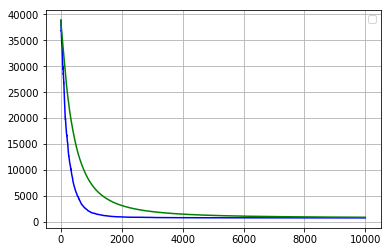

In [59]:
def sgd(A_learn, n, b_learn, x0, dodes):
    x=x0
    L = max(np.linalg.eigh(A_learn.T @ A_learn)[0])
    sum_x = sum([np.linalg.norm(A_learn[i] - sum(A_learn[i])/n)**2 for i in range(n)])
    x_avg=x0
    t=10000
    for j in range (t):
        i = np.random.randint(300)
        h = min((1/n*sum_x)**0.5/j , 1/L)
        #h = 1/L
        gfx = getG(x,i)
        x = x-h*gfx
        x_avg= (x_avg * j + x)/(j+1) 
        fx_in = fx(x,i)
        #test_r.append(func_test(x,i))
        dodes.append(fx_final(x))
        dodes_x.append(fx_final(x_avg))
    return(x)

def show(data, namefile, legends=[],  colors=[], title="", xlabel="", ylabel=""):
    plt.figure()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    colors = iter(colors if colors else ["b", "g", "r", "go:"])
    plt.legend(tuple([plt.plot(el, next(colors)) for el in data]), tuple(legends), loc = 'best')
    plt.grid()
    plt.savefig(f'{namefile}.png', format = 'png')

dodes_x = []
dodes = []
test_r = []
z = sgd(A_learn, n, b_learn, x, dodes)
show([dodes, dodes_x], namefile="graph")

print (sum(dodes)/len(dodes))
print (sum(dodes_x)/len(dodes_x))
print (fx_final(x))